In [65]:
import os
import glob
import numpy as np
import re

In [66]:
import nibabel as nib
import dicom
import pylab
import matplotlib.cm as cm

In [67]:
from PIL import Image
import numpy as np # linear algebra
from keras.preprocessing import image
import os
import numpy as np
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Dropout
from keras.optimizers import Adadelta
from keras.losses import binary_crossentropy
from keras.layers.convolutional import Conv2D
import matplotlib.pyplot as plt
from keras.layers.pooling import MaxPooling2D

In [68]:
import cv2

In [69]:
import sys

import keras
import pandas as pd
import sklearn as sk
import tensorflow as tf

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")

Tensor Flow Version: 1.12.0
Keras Version: 2.2.4

Python 3.6.8 |Anaconda, Inc.| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]
Pandas 0.24.1
Scikit-Learn 0.20.3


In [70]:
print(os.listdir("C:/Users/roshn/Desktop/Just"))

['Just Control', 'Just PD']


In [71]:
data=[]
labels=[]
PD_path =os.listdir("C:/Users/roshn/Desktop/Just/Just PD/")
for pars in PD_path:
    try:
        image=cv2.imread("C:/Users/roshn/Desktop/Just/Just PD/"+ pars)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((64, 64))
        #image_from_array = image_from_array.convert('L')
        data.append(np.array(size_image))
        labels.append(0)
    except Exception as e:
        print(e)

In [73]:
control_path=os.listdir("C:/Users/roshn/Desktop/Just/Just Control/")
for unef in control_path:
    try:
        image=cv2.imread("C:/Users/roshn/Desktop/Just/Just Control/"+ unef)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((64, 64))
        data.append(np.array(size_image))
        labels.append(1)
    except Exception as e:
        print(e)

In [74]:
print('Lenght of Data : ' + str(len(data)))
print('Lenght of Data : ' + str(len(labels)))

Lenght of Data : 10548
Lenght of Data : 10548


In [75]:
numpy_data = np.array(data)
numpy_labels = np.array(labels)

In [76]:
s = np.arange(numpy_data.shape[0])
print(s)
np.random.shuffle(s)
print(s)
numpy_data = numpy_data[s]
print(numpy_data)
numpy_labels = numpy_labels[s]
print(numpy_labels)
data_length = len(numpy_data)

[    0     1     2 ... 10545 10546 10547]
[6457 5749 8947 ... 2290 6586 3898]
[[[[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  ...

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]]


 [[[ 6  6  6]
   [ 9  9  9]
   [13 13 13]
   ...
   [ 1  1  1]
   [ 3  3  3]
   [ 4  4  4]]

  [[ 1  1  1]
   [15 15 15]
   [ 0  0  0]
   ...
   [ 7  7  7]
   [ 8  8  8]
   [ 4  4  4]]

  [[10 10 10]
   [ 8  8  8]
   [ 9  9  9]
   ...
   [ 3  3  3]
   [ 9  9  9]
   [ 4  4  4]]

  ...

  [[ 6  6  6]
   [ 3  3  3]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [13

In [77]:
print('Lenght of Data : ' + str(len(numpy_data)))
print('Lenght of Data : ' + str(len(numpy_labels)))

Lenght of Data : 10548
Lenght of Data : 10548


In [78]:
from keras.layers import Conv2D, MaxPooling2D, MaxPooling1D, GlobalAveragePooling2D, Dense, Dropout, Flatten, Input, LSTM, TimeDistributed
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from sklearn.model_selection import train_test_split
from keras.models import Sequential,Input,Model
from keras.utils import np_utils

In [13]:
#training_X = numpy_data[:round(data_length * 0.9)]
#training_Y = numpy_labels[:round(data_length * 0.9)]
#val_X = numpy_data[len(training_X) :round((len(training_X)) + (len(training_X) * 0.05)) ]
#val_Y = numpy_labels[len(training_Y) :round((len(training_Y)) + (len(training_Y) * 0.05))]
#test_X = numpy_data[round((len(training_X)) + (len(training_X) * 0.05)) : ]
#test_Y = numpy_labels[round((len(training_Y)) + (len(training_Y) * 0.05)): ]

In [79]:
training_X, test_X, training_Y, test_Y = train_test_split(numpy_data, numpy_labels, test_size = 0.1, random_state = 101)
val_X = numpy_data[len(training_X) :round((len(training_X)) + (len(training_X) * 0.05)) ]
val_Y = numpy_labels[len(training_Y) :round((len(training_Y)) + (len(training_Y) * 0.05))]

In [80]:
#one hot encoding
training_Y = np_utils.to_categorical(training_Y,  2)
test_Y = np_utils.to_categorical(test_Y,  2)
val_Y = np_utils.to_categorical(val_Y,  2)

In [81]:
training_X = training_X.astype('float64') / 255
val_X = val_X.astype('float64') / 255
test_X = test_X.astype('float64') / 255

In [82]:
print(f'Shape of training image : {training_X.shape}')
print(f'Shape of testing image : {test_X.shape}')
print(f'Shape of training labels : {training_Y.shape}')
print(f'Shape of testing labels : {test_Y.shape}')
print(f'Shape of training labels : {val_Y.shape}')
print(f'Shape of testing labels : {val_X.shape}')

Shape of training image : (9493, 64, 64, 3)
Shape of testing image : (1055, 64, 64, 3)
Shape of training labels : (9493, 2)
Shape of testing labels : (1055, 2)
Shape of training labels : (475, 2)
Shape of testing labels : (475, 64, 64, 3)


In [83]:
import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K

from keras import optimizers

In [84]:
print('Lenght of Data : ' + str(len(training_X)))
print('Lenght of Data : ' + str(len(val_X)))
print('Lenght of Data : ' + str(len(test_X)))

Lenght of Data : 9493
Lenght of Data : 475
Lenght of Data : 1055


In [85]:
visible = Input(shape=(64,64,3))

conv1 = Conv2D(32, kernel_size=3, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

conv2 = Conv2D(64, kernel_size=3, activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

drop = Dropout(0.20)(pool2)
flat = Flatten()(drop)
hidden1 = Dense(128, activation='relu')(flat)
output = Dense(2, activation='sigmoid')(hidden1)
model=Sequential()
model = Model(inputs=visible, outputs=output)
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 12544)             0         
__________

In [86]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [87]:
graph_viz = model.fit(
        training_X,
        training_Y,
        epochs = 30,
        batch_size = 32,
        validation_data=(val_X,val_Y)    
        )

Train on 9493 samples, validate on 475 samples
Epoch 1/30
9493/9493 [==============================] - 47s 5ms/step - loss: 0.5490 - acc: 0.7043 - val_loss: 0.3465 - val_acc: 0.8716
Epoch 2/30
9493/9493 [==============================] - 49s 5ms/step - loss: 0.2652 - acc: 0.8822 - val_loss: 0.1766 - val_acc: 0.9232
Epoch 3/30
9493/9493 [==============================] - 51s 5ms/step - loss: 0.1484 - acc: 0.9365 - val_loss: 0.0689 - val_acc: 0.9716
Epoch 4/30
9493/9493 [==============================] - 53s 6ms/step - loss: 0.0943 - acc: 0.9595 - val_loss: 0.0376 - val_acc: 0.9905
Epoch 5/30
9493/9493 [==============================] - 54s 6ms/step - loss: 0.0688 - acc: 0.9739 - val_loss: 0.0445 - val_acc: 0.9821
Epoch 6/30
9493/9493 [==============================] - 56s 6ms/step - loss: 0.0485 - acc: 0.9827 - val_loss: 0.0245 - val_acc: 0.9937
Epoch 7/30
9493/9493 [==============================] - 58s 6ms/step - loss: 0.0342 - acc: 0.9879 - val_loss: 0.0111 - val_acc: 0.9979
Epoch 8/

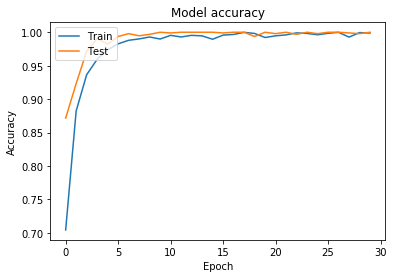

In [88]:
plt.plot(graph_viz.history['acc'])
plt.plot(graph_viz.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

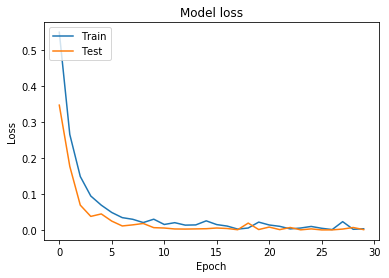

In [89]:
plt.plot(graph_viz.history['loss'])
plt.plot(graph_viz.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [90]:
# make predictions on the test set
preds = model.predict(test_X)
from sklearn.metrics import accuracy_score

print(accuracy_score(test_Y.argmax(axis=1), preds.argmax(axis=1)))

0.985781990521327


In [91]:
from sklearn.metrics import classification_report
print(classification_report(test_Y.argmax(axis=1), preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       627
           1       0.99      0.97      0.98       428

   micro avg       0.99      0.99      0.99      1055
   macro avg       0.99      0.98      0.99      1055
weighted avg       0.99      0.99      0.99      1055



In [92]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    from sklearn.metrics import confusion_matrix
    from sklearn.utils.multiclass import unique_labels
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[623   4]
 [ 11 417]]


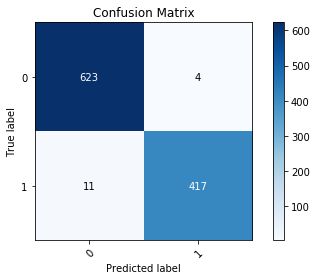

In [93]:
class_names=np.array((0,1))
plot_confusion_matrix(test_Y.argmax(axis=1), preds.argmax(axis=1), classes=class_names, title='Confusion Matrix')

In [94]:
test_loss,test_acc = model.evaluate(test_X,test_Y)
print(test_loss)
print(test_acc)

1055/1055 [==============================] - 2s 1ms/step
0.041131665817129764
0.9867298578199052
